In [140]:
import scipy
from  scipy   import   stats
import random
import numpy as np
import matplotlib.pyplot as plt

In [141]:
#Why rvs() ? because it generates pseudo random 'variable' value at a time, and not a pseudo random 'sample'
#why use random_state ? if we get a randomly generated value at a particular state, we will get the 'same value' of the same state again ~ prevent reproducability

def generate():
  
  user_session = stats.geom.rvs(size=4000,p=0.3,random_state=42)
  return user_session
              
user_session=generate()

In [142]:
user_session.size,user_session.max(),user_session.min()

(4000, 23, 1)

In [143]:
user_session[:10],sum(user_session)

(array([2, 9, 4, 3, 1, 1, 1, 6, 3, 4]), 13258)

In [144]:
count_dict = {x : list(user_session).count(x) for x in user_session}
count_dict

{2: 811,
 9: 68,
 4: 411,
 3: 590,
 1: 1228,
 6: 199,
 10: 63,
 5: 302,
 7: 134,
 8: 89,
 13: 16,
 11: 28,
 12: 25,
 14: 11,
 23: 1,
 16: 6,
 17: 6,
 18: 3,
 15: 6,
 21: 1,
 20: 1,
 22: 1}

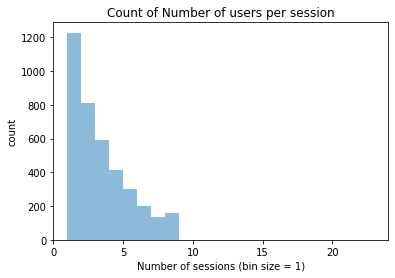

In [145]:
#depicts number of users per number of sessions
    
bins = np.arange(0, 10, 1) # fixed bin size

plt.xlim([min(user_session)-1, max(user_session) +1])

plt.hist(user_session, bins=bins, alpha=0.5)
plt.title("Count of Number of users per session")
plt.xlabel('Number of sessions (bin size = 1)')
plt.ylabel('count')

plt.show()

In [146]:
import numpy as np
user_Id = range(1,4000)

In [147]:
userId_session = zip(user_Id,[10*i for i in user_session]) #generating random id's for each session

In [148]:
type(userId_session)

zip

In [149]:
userId_session = list(userId_session)

In [150]:
len(userId_session)

3999

In [151]:
#Calculating tobtal numer of articles served in first session for all users (may be clicked or not)
#first recommendation is independent ...

sum1 = 0
for i in range(len(userId_session)):
    
    sum1 += userId_session[i][1]
    
sum1

132570

In [152]:
UserIDs = []

for i in range(len(userId_session)):
    
    for j in range(userId_session[i][1]):
        UserIDs.append(userId_session[i][0])
            

In [153]:
len(UserIDs)   #matches with sum1 above

132570

In [154]:
UserIDs[20:60]   # UserIds generated for all sessions the user opens

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [155]:
session_list = list(user_session)
session_list[:10]

[2, 9, 4, 3, 1, 1, 1, 6, 3, 4]

In [156]:
session_Id =[]

for i in session_list:
    
    for j in range(1,i+1):
#         print j
        session_Id.append([j for i in range(10)])

In [157]:
session_Id[:5]

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]]

In [158]:
session_Id = np.array(session_Id).flatten()

In [159]:
session_Id[:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [160]:
session_Id.shape

(132580,)

In [161]:
User_session = zip(UserIDs,session_Id )
User_session = list(User_session)

In [162]:
len(User_session),type(User_session)

(132570, list)

In [163]:
User_session[:24]

[(1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (2, 1),
 (2, 1),
 (2, 1),
 (2, 1)]

In [164]:
import pandas as pd

df = pd.DataFrame(User_session, columns=['UserId', 'SessionId'])

In [165]:
df.head()

,UserId,SessionId
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [166]:
Article_Id = list(range(4829))

In [167]:
Article_Id = Article_Id * int(132580/4829)  #(total articles served in one day / no. of unique articles)

len(Article_Id)

130383

In [168]:
Article_Id[0]

0

In [169]:
len(User_session)-len(Article_Id)

2187

In [170]:
import random
for x in range(len(User_session)-len(Article_Id)):# to make square matrix
    Article_Id.append(random.randint(1,4829))

In [171]:
Article_Id

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [172]:
len(Article_Id)

132570

In [173]:
from random import shuffle
shuffle(Article_Id)
# so that no pattern remains between article id and user id

In [174]:
df['ArticleId_served'] = Article_Id

In [175]:
df.head(10)

,UserId,SessionId,ArticleId_served
0,1,1,2235
1,1,1,4563
2,1,1,698
3,1,1,2019
4,1,1,3150
5,1,1,2638
6,1,1,411
7,1,1,853
8,1,1,2242
9,1,1,1553


In [176]:
len(df)

132570

In [177]:
df1=df.copy()
groups1=df1.groupby(['UserId']) #ek session ch kinne ids ne teh kinne sessions ne
groups1.get_group(1).ArticleId_served.to_list()

[2235,
 4563,
 698,
 2019,
 3150,
 2638,
 411,
 853,
 2242,
 1553,
 1841,
 4567,
 1649,
 1300,
 1864,
 3231,
 2323,
 1238,
 4545,
 4603]

In [178]:
df1.UserId.unique()
user_table={}
for  i  in range(1,len(df1.UserId.unique())+1):
  user_table[i]=groups1.get_group(i).ArticleId_served.to_list()

In [179]:
user_table

{1: [2235,
  4563,
  698,
  2019,
  3150,
  2638,
  411,
  853,
  2242,
  1553,
  1841,
  4567,
  1649,
  1300,
  1864,
  3231,
  2323,
  1238,
  4545,
  4603],
 2: [183,
  3154,
  1749,
  91,
  2260,
  3503,
  1107,
  3860,
  4798,
  3883,
  4546,
  1626,
  4615,
  990,
  4820,
  4759,
  1187,
  198,
  3811,
  2246,
  397,
  2257,
  3209,
  3741,
  1444,
  4530,
  1651,
  4656,
  4206,
  3814,
  4597,
  1862,
  4408,
  4604,
  4691,
  1297,
  1052,
  2650,
  2593,
  1465,
  3090,
  4441,
  3573,
  975,
  3373,
  397,
  635,
  1056,
  3724,
  3254,
  1651,
  2706,
  2001,
  2934,
  3191,
  1976,
  2,
  1036,
  4143,
  3584,
  2269,
  3925,
  2173,
  360,
  625,
  1865,
  1371,
  4782,
  3618,
  1600,
  306,
  1141,
  990,
  4775,
  740,
  3074,
  918,
  376,
  1782,
  832,
  4419,
  1257,
  3885,
  1494,
  2645,
  120,
  4348,
  3577,
  319,
  3620],
 3: [4316,
  3281,
  4078,
  2430,
  1192,
  2595,
  2726,
  3208,
  1903,
  1632,
  2384,
  385,
  1741,
  4532,
  2639,
  3244,
  3719,

In [180]:
s = (3999,4830)

zero_user_table=np.zeros(s)
zero_user_table.shape

(3999, 4830)

In [181]:
for i in  range(1,3999):
  ls=user_table[i]
  for j  in  ls:
    zero_user_table[i][j]=1

In [182]:
zero_user_table[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [183]:
np.save('user-item-table',zero_user_table)

In [184]:
from scipy import stats


#https://stackoverflow.com/questions/48409212/what-is-the-meaning-of-mu-loc-and-size-in-the-scipy-stats-poisson

# mu stands for mean

# size  stands for number of random variables we want to generate
clicks_per_session = stats.poisson.rvs(size= 13257,  # Generate Poisson data (len(df)/10)
                                       mu=1 , loc = 1,random_state=42 )       # Average clicks per session = 1

# divided by  10 

# Print table of counts
print( pd.crosstab(index="counts", columns= clicks_per_session)) # to see  the frequency  of clicks in a session


col_0      1     2     3    4    5   6  7  8
row_0                                       
counts  4877  4885  2413  837  199  39  6  1


In [185]:
len(clicks_per_session)

13257

In [186]:
clicks_per_session,len(clicks_per_session)

(array([2, 3, 1, ..., 1, 2, 2]), 13257)

In [187]:

def click_checker():
  clicked_or_not = []
  random.seed(12)
  for clicks in clicks_per_session:
      
      session_list = [0 for i in range(10-clicks)] 
      #for ex if there are 3 clicks in a session we will insert 10-3=7. Seven zeros that means
      # any 7 items were not clicked
      
      for i in range(clicks):
          
          session_list.append(1) # append ones for no of clicks per session
          
      random.shuffle(session_list) #user can click any item from 10 articles shown to it
      clicked_or_not.append(session_list)
  return clicked_or_not
clicked_or_not=click_checker()
  

In [188]:
clicked_or_not[0]

[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [189]:
len(clicked_or_not)  

13257

In [190]:
click = np.array(clicked_or_not).flatten()
click.shape,click.sum()                  #Converted into a binary array depicting clicks and No-click

click_sum=click.sum()
print(click_sum)

26513


In [191]:
df['Click'] = click

In [192]:
df.head(1)

,UserId,SessionId,ArticleId_served,Click
0,1,1,2235,1


In [193]:
len(list(df['ArticleId_served'].unique()))

4830

In [194]:

clicks=pd.DataFrame(columns=['Article','Total_clicks'])
for i in range(len(list(df['ArticleId_served'].unique()))):
  _temp=df.groupby('ArticleId_served')
  _1=_temp.get_group(i)['Click'].sum()
  clicks=clicks.append({'Article':i,'Total_clicks':_1},ignore_index=True)

In [195]:
clicks.to_csv('clicks.csv')

In [196]:
from scipy.stats import chi
from scipy.stats import norm
import scipy
# first argument in norm is loc a.k.a mean and second argument is standard devaition a.k.a standard deviation
# mycomps = (chi(2,3,8),norm(30, 9),norm(60,9),norm(90,8))
mycomps=(norm(30,9),norm(60,9),norm(90,9))
priors = [0.45,0.25,0.15]

In [197]:
print(mycomps[0].pdf(39))

0.026885636057682596


In [198]:
def myMixture(x,priors,myComponents):
    s = 0
    for comp,prior in zip(myComponents,priors):
        s += comp.pdf(x)*prior
    return s

In [199]:
import numpy as np
x_data = np.linspace(0.0,100,1000)   #Generates 1000 numbers between 0 and 100
#using uniform distribution


In [200]:
y_data = myMixture(x_data,priors,mycomps)
y_data[:5]

array([7.71139523e-05, 8.00215912e-05, 8.30285932e-05, 8.61379341e-05,
       8.93526630e-05])

In [201]:
len(y_data)

1000

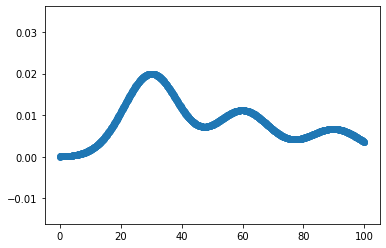

In [202]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x_data,y_data)

In [203]:
def genSample(sample_size,priors,myComponents):
    myData = np.empty( shape=(0) )
    for prior,comp in zip(priors,myComponents):
        new_data = comp.rvs(int(sample_size*prior))
        myData = np.append(myData,new_data)
    return myData
  # this function actually means the priority we want to give to each one of 3 distributions
  # by deciding the number of data points they contribute to total no of clicks for their corresponding percentage time
  # means if distribution norm(20,9) has prior of 0.35 it means 35 percent of varibale will belong to this distribution


In [204]:
data = genSample(click_sum,priors,mycomps)

len(data)

22534

In [205]:
print(data[:1],data.min(),data.max())

for i in range(len(data)):
    if data[i]<0:
        data[i] *= -1 # multiplying by -1 to make the corresponding time positve it's kind of taking absolute  of number
        # because time cannot be negative

[42.04537605] -5.392540429702741 120.71315109020705


In [206]:
print(min(data),max(data),len(data))
data = np.append(data,[10])
len(data)

0.33995542003909307 120.71315109020705 22534


22535

In [207]:
data[0]

42.04537604949575

In [208]:
click[:20]

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1])

In [210]:
final_time = click
j=0
for i in range(len(click)):
    
    if click[i] == 1: #where  there is a click assign that point a  time that we created by gaussian mixture model
        final_time[i] = data[j]
        j +=1

In [211]:
len(final_time),final_time[:100]

(132570,
 array([42, 39,  0,  0,  0,  0,  0,  0,  0,  0,  0, 43,  0, 24,  0,  0,  0,
         0,  0, 29,  0, 35,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 25,
         0,  0,  0,  0,  0,  0,  0,  0,  0, 34,  0,  0, 27, 40,  0, 17,  0,
        26, 14,  0,  0,  0,  0,  0,  0, 27, 31,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0, 35,  0,  0,  0,  0,  0,  0,  0,
         0, 22,  0,  0,  0,  0,  0,  0,  0, 28,  0, 27,  0,  0,  0]))

In [212]:
df['Time Spent'] = final_time

df.head(21)

,UserId,SessionId,ArticleId_served,Click,Time Spent
0,1,1,2235,1,42
1,1,1,4563,1,39
2,1,1,698,0,0
3,1,1,2019,0,0
4,1,1,3150,0,0
5,1,1,2638,0,0
6,1,1,411,0,0
7,1,1,853,0,0
8,1,1,2242,0,0
9,1,1,1553,0,0


In [213]:
df['Time Spent'].min()


0

In [214]:
df.to_csv("Generated_Click_Stream_Data.csv")